In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
b_calendar = pd.read_csv('./boston/calendar.csv')
b_listing = pd.read_csv('./boston/listings.csv')
b_review = pd.read_csv('./boston/reviews.csv')

s_calendar = pd.read_csv('./seattle/calendar.csv')
s_listing = pd.read_csv('./seattle/listings.csv')
s_review = pd.read_csv('./seattle/reviews.csv')

# Data values visualization

In [3]:
b_calendar.isnull().mean()

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

In [4]:
s_calendar.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [5]:
b_listing.isnull().mean().sort_values()

id                              0.000000
host_identity_verified          0.000000
street                          0.000000
neighbourhood_cleansed          0.000000
state                           0.000000
                                  ...   
square_feet                     0.984379
has_availability                1.000000
license                         1.000000
jurisdiction_names              1.000000
neighbourhood_group_cleansed    1.000000
Length: 95, dtype: float64

In [6]:
s_listing.isnull().mean().sort_values()

id                  0.000000
price               0.000000
amenities           0.000000
bed_type            0.000000
accommodates        0.000000
                      ...   
weekly_price        0.473808
security_deposit    0.511262
monthly_price       0.602672
square_feet         0.974594
license             1.000000
Length: 92, dtype: float64

In [7]:
b_review.isnull().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000776
dtype: float64

In [8]:
s_review.isnull().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

# Removing columns with empty values

In [9]:
print(s_listing.shape)
print(b_listing.shape)

s_listing.dropna(how='all', axis=1)
b_listing.dropna(how='all', axis=1)

print(s_listing.shape)
print(b_listing.shape)

(3818, 92)
(3585, 95)
(3818, 92)
(3585, 95)


# Finding variables types

b_calendar.info()

In [10]:
s_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [11]:
b_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [12]:
s_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [13]:
b_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [14]:
s_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


# Questions to be answered by this dataset
<h5>- witch Boston region has more people hosted (map plot)</h5>
<h5>- words counts on comments</h5>
<h5>- week day barplot, showing the week days with most hosted places</h5>
<h5>- predict pricing, by selecting the relevant columns</h5>

In [15]:
b_listing.latitude.value_counts()

42.282619    1
42.363852    1
42.350763    1
42.343016    1
42.344927    1
            ..
42.345028    1
42.343767    1
42.347171    1
42.343842    1
42.387888    1
Name: latitude, Length: 3585, dtype: int64

In [16]:
b_listing.longitude.value_counts()

-71.133068    1
-71.064699    1
-71.095259    1
-71.099856    1
-71.099312    1
             ..
-71.076663    1
-71.074937    1
-71.071297    1
-71.070075    1
-71.080654    1
Name: longitude, Length: 3585, dtype: int64

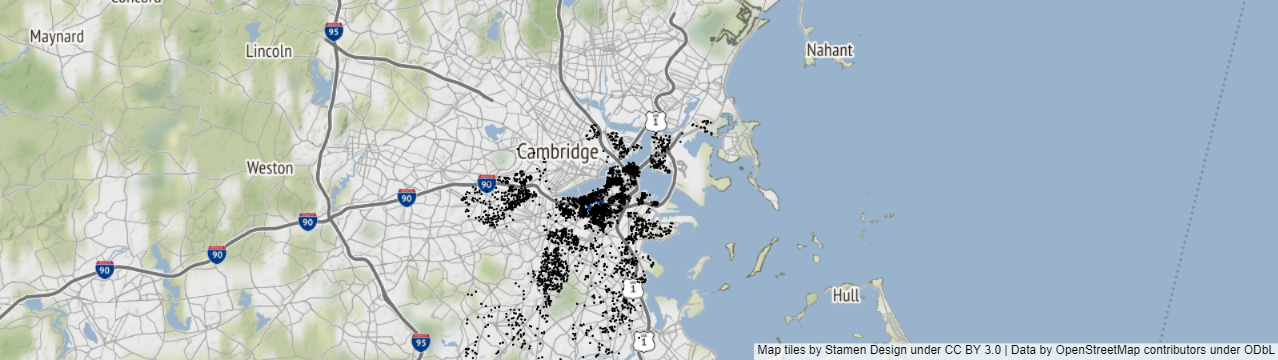

In [27]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers",
    lon = b_listing.longitude, lat = b_listing.latitude,
    marker = {'size': 3, 'color': ["white"]}))

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': { 'lon': -71.05, 'lat': 42.36},
        'zoom': 10, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature"
                }]
            },
            'type': "fill", 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})

fig.show()

<h3>by the plot we can see that is possible to identify regions with more places used by airbnb, than anothers<h3/>

# Counting the words on comments

In [28]:
s = b_review['comments'].str.split(expand=True).stack().value_counts()

In [20]:
print(s[0:50])

and          192405
the          157990
to           122810
was          119168
a            117088
is            71091
in            69298
The           59298
very          53885
I             53614
of            47633
for           46015
with          36431
we            35437
great         27683
stay          26130
were          25264
We            24370
place         23416
had           22915
it            22676
our           22436
apartment     21856
at            21844
as            21611
you           19631
us            18028
but           17878
on            17657
my            17338
that          16704
room          15744
from          15674
Boston        15642
would         15574
this          14793
location      14344
so            14291
nice          13907
are           13190
clean         12943
an            12576
It            12536
not           12528
have          12244
really        11747
all           11673
there         11464
recommend     10948
Boston.       10592


In [21]:
print(s[50:100])

house           10363
be              10274
easy            10099
me               9969
time             9411
everything       9279
definitely       9171
good             9051
just             9031
close            8901
which            8876
walk             8682
made             8676
get              8609
if               8455
also             8351
comfortable      8221
well             8008
out              7882
This             7872
her              7748
host             7691
about            7685
when             7567
-                7509
perfect          7079
neighborhood     6672
Great            6656
staying          6569
home             6517
like             6493
only             6464
even             6441
or               6203
has              6091
he               6049
one              5979
stay.            5905
here             5870
could            5734
She              5730
He               5725
by               5659
his              5558
will             5505
helpful   

In [ ]:
d = {'adjective': ['very', 'great', 'nice', 'clean', 'easy', 
                   'good', 'close', 'comfortable', 'perfect', 'Great'], 
     'frequency': [53885, 27683, 13907, 12943, 10099, 
                   9051, 8901, 8221, 7079, 6656]}

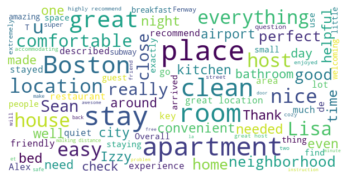

<Figure size 1440x1440 with 0 Axes>

In [54]:
from wordcloud import WordCloud
from matplotlib.pyplot import figure


text3 = ' '.join(b_review.comments.head(1000))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", width=600, height=300).generate(text3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

figure(figsize=(20, 20))
plt.show()
wordcloud.to_file("100_reviews.png")

<h3/>Analysing the first 100`s most frequent words, we can observe that adjectives related to compliments are very frequent on users comments<h3/>

In [22]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories=cats, ordered=True)
only_dates = pd.to_datetime(b_calendar.date[b_calendar.available == 'f']).dt.day_name().astype(cat_type)
# only_dates = pd.to_datetime(b_calendar.date).dt.day_name().astype(cat_type)

only_dates.value_counts()

Tuesday      96726
Friday       95474
Saturday     95404
Thursday     95270
Wednesday    94656
Sunday       94264
Monday       94059
Name: date, dtype: int64

In [23]:
only_dates.value_counts().index

CategoricalIndex(['Tuesday', 'Friday', 'Saturday', 'Thursday', 'Wednesday',
                  'Sunday', 'Monday'],
                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True, dtype='category')

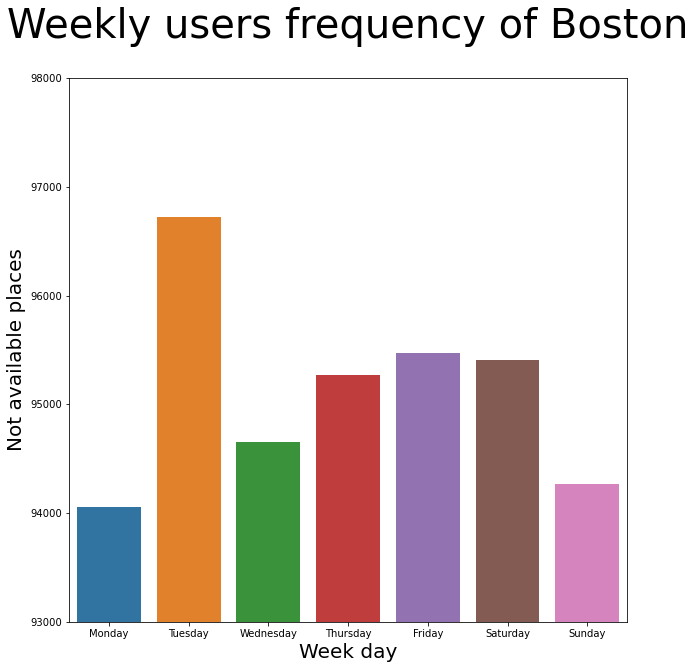

In [70]:
plt.figure(figsize=(10, 10))
sample_plot = sns.barplot(x=only_dates.value_counts().index, y=only_dates.value_counts())
sample_plot.set(ylim=(93000, 98000))
sample_plot.axes.set_title("Weekly users frequency of Boston", fontsize=40, pad=40)
sample_plot.set_xlabel("Week day",fontsize=20)
sample_plot.set_ylabel("Not available places",fontsize=20)

plt.savefig('week_day.png')

<h3/>as depicted on the plot above, is possible to notice that in a whole year, the airbnb clients prefer to rent a place on Tuesday, and not on weekends (as espected, because people often travel more on weekends that during week)<h3/>

# Finding which columns to use for price prediction

<h3>Selecting columns to use in analysis<h3/>

In [25]:
b_calendar[(b_calendar['listing_id'] == 3075044) & (~b_calendar['price'].isnull())]

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00
...,...,...,...,...
722,3075044,2017-03-10,t,$75.00
723,3075044,2017-03-09,t,$65.00
724,3075044,2017-03-08,t,$65.00
725,3075044,2017-03-07,t,$65.00
